<a href="https://colab.research.google.com/github/rajadevineni/Applied_ML_Coding_Exam1/blob/main/Exam_1_Drive_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Results

The best model choosen based on CV score is : **XGBoost**

XGBoost is choosen as it has the best Test, Train and Mean validation scores of all the models. XGBoost model utilizes GPUs to run faster than any other models which could help to use this model even with bigger datasets in the future.

~~~
Best Mean Cross Validation Score: -678.9862029154766
Best Mean Cross Validation Score: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 4,
'n_estimators': 20,'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
Train score of the best model: -660.9512372833724
Test score of the best model: -688.5596352131228
~~~

# Importing libraries and dataset

In [1]:
!pip install feature_engine

     |████████████████████████████████| 9.5MB 10.1MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from pathlib import Path

pd.pandas.set_option('display.max_columns', None)
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Grid Search import

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

### Load Datasets

In [4]:
# load dataset
# your code here
path = "https://raw.githubusercontent.com/rajadevineni/Applied_ML_Coding_Exam1/main/train_rev.csv"
data = pd.read_csv(path)
print('Shape of Dataset: ',data.shape)

Shape of Dataset:  (21788, 60)


In [5]:
data.rename(columns={"id ": "id"}, inplace=True)
data.head()

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,v51,v52,v53,v54,v55,v56,v57,v58,target
0,1,13,472,0.516129,1.0,0.677656,7,3,1,0,4.843220,4,0,0,0,0,0,1,-1,0.0,-1.000000,67700,843300,417575.0000,2185.450945,3467.837885,2639.664540,568.0,5800.0,2323.666667,0,0,0,1,0,0,0,0,0.050001,0.050000,0.799993,0.050000,0.050006,0.408591,0.047852,0.012712,0.004237,0.750000,0.250000,0.278283,0.100000,0.6,-0.523810,-0.714286,-0.333333,0.000000,0.000000,0.500000,0.000000,1600
1,2,12,701,0.522963,1.0,0.677201,10,5,10,1,4.763195,9,0,0,0,0,0,1,-1,804.0,193.625000,0,843300,209755.5556,0.000000,4101.893971,2114.472589,0.0,0.0,0.000000,0,0,0,1,0,0,0,0,0.244963,0.022224,0.571054,0.022223,0.139535,0.406442,0.185152,0.051355,0.007133,0.878049,0.121951,0.368439,0.033333,1.0,-0.275000,-0.600000,-0.050000,0.222222,0.244444,0.277778,0.244444,1700
2,3,8,174,0.724551,1.0,0.896226,1,1,1,0,4.385057,5,0,0,0,0,1,0,217,342.0,279.500000,0,617900,142120.0000,0.000000,3159.522593,2108.652601,0.0,0.0,0.000000,1,0,0,0,0,0,0,0,0.040030,0.040623,0.040019,0.040019,0.839309,0.255628,0.029437,0.011494,0.022989,0.333333,0.666667,0.366667,0.333333,0.4,-0.102381,-0.166667,-0.071429,0.000000,0.000000,0.500000,0.000000,3100
3,4,10,2347,0.359368,1.0,0.551497,36,8,3,1,4.907542,6,0,0,1,0,0,0,-1,1100.0,271.666667,27700,843300,327316.6667,3193.319812,6003.888889,4260.332820,1700.0,25900.0,10233.333330,0,0,0,0,0,0,1,1,0.700278,0.198502,0.033334,0.033334,0.034553,0.479196,0.171219,0.051129,0.014913,0.774194,0.225806,0.374936,0.033333,1.0,-0.245176,-0.800000,-0.050000,0.000000,0.000000,0.500000,0.000000,1800
4,5,7,280,0.563636,1.0,0.700599,8,5,1,0,5.132143,8,0,0,1,0,0,0,-1,718.0,263.698750,4800,843300,222525.0000,1838.148148,3582.545966,2503.522903,860.0,7900.0,2940.000000,0,1,0,0,0,0,0,0,0.475835,0.025101,0.279301,0.025000,0.194762,0.350535,0.166043,0.039286,0.000000,1.000000,0.000000,0.288430,0.100000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,2900


In [6]:
data.columns

Index(['id', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30',
       'v31', 'v32', 'v33', 'v34', 'v35', 'v36', 'v37', 'v38', 'v39', 'v40',
       'v41', 'v42', 'v43', 'v44', 'v45', 'v46', 'v47', 'v48', 'v49', 'v50',
       'v51', 'v52', 'v53', 'v54', 'v55', 'v56', 'v57', 'v58', 'target'],
      dtype='object')

### Types of variables



In [7]:
# we have an Id variable, that we should not use for predictions:

print('Number of  Id labels: ', len(data.id.unique()))
print('Number of records in the Dataset: ', len(data))
print('Shape of Dataset: ', data.shape)

Number of  Id labels:  21788
Number of records in the Dataset:  21788
Shape of Dataset:  (21788, 60)


#### Find categorical variables

In [8]:
# find categorical variables- hint data type = 'O'

categorical = [var for var in data.columns if data[var].dtype=='O']

print(f'There are {len(categorical)} categorical variables')

There are 0 categorical variables


#### Find temporal variables

In [9]:
# make a list of the numerical variables first= Hint data type != O
numerical = [var for var in data.columns if data[var].dtype!='O']

# list of variables that contain year information= Hint variable namme has Yr or 
year_vars = [var for var in numerical if 'Yr' in var or 'Year' in var]

year_vars

[]

#### Find discrete variables

To identify discrete variables- numerical variables with less than 20 unique values 

In [10]:
# let's visualise the values of the discrete variables
discrete = [var for var in numerical if len(data[var].unique()) < 20 and var not in year_vars]

print(f'There are {len(discrete)} discrete variables')

There are 16 discrete variables


#### Continuous variables

In [11]:
# find continuous variables- hint numerical variables not in discrete and  year_years 
# Also remove the Id variable and the target variable SalePrice
# which are both also numerical

continuous = [var for var in numerical if var not in discrete and var not in [
    'id', 'target'] and var not in year_vars]

print('There are {} numerical and continuous variables'.format(len(numerical)))

There are 60 numerical and continuous variables


In [12]:
data.isna().sum()

id        0
v1        0
v2        0
v3        0
v4        0
v5        0
v6        0
v7        0
v8        0
v9        0
v10       0
v11       0
v12       0
v13       0
v14       0
v15       0
v16       0
v17       0
v18       0
v19       0
v20       0
v21       0
v22       0
v23       0
v24       0
v25       0
v26       0
v27       0
v28       0
v29       0
v30       0
v31       0
v32       0
v33       0
v34       0
v35       0
v36       0
v37       0
v38       0
v39       0
v40       0
v41       0
v42       0
v43       0
v44       0
v45       0
v46       0
v47       0
v48       0
v49       0
v50       0
v51       0
v52       0
v53       0
v54       0
v55       0
v56       0
v57       0
v58       0
target    0
dtype: int64

## Correlations and Choosing variables

### Creating correlation matrix

In [13]:
corr_matrix = data.corr(method='pearson', min_periods=1)
corr_matrix.head(10)

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,v51,v52,v53,v54,v55,v56,v57,v58,target
id,1.000000,0.014367,0.001467,-0.003017,-0.004081,-0.001577,0.008028,0.006963,0.002073,0.001700,-0.003362,-0.007979,0.013182,-0.001097,0.002486,0.002979,0.004483,-0.008332,-0.004539,-0.000268,0.000801,-0.001160,0.000376,0.003799,-0.002165,-0.008286,-0.007389,-0.000146,-0.007493,-0.003041,-0.007567,-0.000778,0.007251,-0.005192,-0.006603,0.000777,0.017767,0.013940,-0.000461,-0.003319,-0.002408,-0.002773,0.008114,-0.005417,-0.000162,-0.002691,0.001186,-0.004523,0.000813,-0.001502,-0.013323,0.000805,0.005021,-0.001014,0.011731,0.006888,0.011617,-0.008534,0.016061,-0.003209
v1,0.014367,1.000000,0.029121,-0.057403,-0.041141,-0.050053,-0.041310,-0.009356,-0.005569,0.055939,-0.068985,0.002488,-0.070840,0.137644,-0.024785,-0.084697,-0.048908,0.043919,-0.105126,0.000183,-0.028322,0.014286,0.117782,0.108533,0.004525,0.010390,0.007286,-0.001189,-0.000021,0.002608,0.005015,0.003871,0.007616,-0.015244,0.002764,-0.016606,0.010026,-0.004227,-0.066652,0.059835,0.031808,0.047442,-0.063710,-0.055288,-0.063674,-0.060646,0.010846,-0.056119,0.025967,-0.046264,-0.030663,-0.015508,-0.013646,-0.029328,0.018749,0.091995,0.006818,-0.147986,0.052427,-0.040689
v2,0.001467,0.029121,1.000000,-0.414433,0.203188,-0.235277,0.426691,0.305844,0.355892,0.114144,0.170461,0.066294,0.031074,0.072071,-0.018597,0.028214,0.013611,0.059418,-0.054957,0.002988,-0.001025,-0.023369,0.063412,-0.091289,-0.024937,-0.027361,-0.080061,-0.037750,0.029038,-0.016785,-0.006655,-0.005208,-0.029289,-0.004778,-0.010837,0.046714,0.042886,0.065465,0.015174,-0.005078,0.092546,-0.129865,0.026406,0.133472,0.009227,0.128283,0.137527,0.087319,0.111323,0.133649,-0.264084,0.419746,-0.141177,-0.460187,0.226028,0.014140,0.022869,0.000600,0.023132,0.051468
v3,-0.003017,-0.057403,-0.414433,1.000000,0.670742,0.937666,-0.117865,-0.056779,-0.242130,0.014025,0.646997,-0.079346,-0.012233,-0.007073,0.052424,0.017965,0.010218,-0.073973,0.089758,-0.001145,0.014488,-0.004932,-0.099022,-0.048775,-0.031155,-0.010647,-0.036244,0.051846,0.021283,0.047591,0.008689,0.000079,0.006407,0.007840,0.008847,-0.034609,-0.015275,-0.036068,0.039109,0.057253,-0.078629,-0.005708,0.004754,0.470811,0.178138,0.289703,0.163179,0.441318,0.176483,0.417904,0.402976,0.149951,-0.205816,0.042057,-0.326351,-0.006775,-0.018639,-0.004982,-0.019730,-0.048139
v4,-0.004081,-0.041141,0.203188,0.670742,1.000000,0.760925,0.168321,0.145415,0.008821,0.017300,0.941896,-0.028522,0.027296,-0.004716,0.067411,0.033880,0.074461,0.002806,0.049125,0.001289,0.019563,-0.040715,-0.052508,-0.168042,-0.081283,-0.049282,-0.149959,0.035422,0.041986,0.045306,0.008207,0.004862,-0.012042,0.003935,-0.003405,-0.003523,0.001083,-0.001684,0.077215,0.008714,0.020476,-0.190710,0.091582,0.655296,0.211910,0.388268,0.263376,0.618089,0.314026,0.585733,0.227717,0.525233,-0.345348,-0.304589,-0.191978,-0.025692,0.000563,0.013730,-0.024237,-0.011858
v5,-0.001577,-0.050053,-0.235277,0.937666,0.760925,1.000000,-0.108779,-0.029132,-0.296027,0.006489,0.702016,-0.079799,0.015117,-0.018234,0.086008,0.022972,0.034435,-0.025472,0.081664,0.001446,0.019168,-0.018053,-0.088487,-0.096877,-0.069764,-0.036680,-0.108937,0.041652,0.019999,0.039032,0.009502,0.001039,0.003313,0.008596,0.009928,-0.029823,-0.020331,-0.036482,0.085210,0.043276,-0.026945,-0.130046,0.045062,0.511863,0.176202,0.340834,0.210558,0.485945,0.218869,0.456497,0.316896,0.267667,-0.245820,-0.083986,-0.259019,-0.026105,-0.027481,0.010628,-0.037977,-0.048733
v6,0.008028,-0.041310,0.426691,-0.117865,0.168321,-0.108779,1.000000,0.400459,0.341496,0.112166,0.221202,0.116864,0.054637,0.005872,-0.065349,0.065469,-0.064321,-0.027912,-0.035502,0.007277,0.004149,-0.020055,0.046818,-0.028758,0.057985,0.064764,0.114925,-0.011916,0.089808,0.025686,-0.008253,-0.013947,-0.040218,-0.016267,0.006406,0.064194,0.05

In [14]:
def highest_corr(df):
  high_corr_pairs = set()
  cols = df.columns
  ids = df.index
  for i in range(0, df.shape[1]):
    for j in range(0,i+1):
      if df.iloc[i,j]>=0.5:        
        if cols[i]!=ids[j]:
          high_corr_pairs.add((cols[i], ids[j]))
          print(cols[i],cols[j])
  return high_corr_pairs
print("Highly correlated pairs:")
print("Total Highly correlated pairs",len(highest_corr(corr_matrix)))

Highly correlated pairs:
v4 v3
v5 v3
v5 v4
v10 v3
v10 v4
v10 v5
v20 v19
v23 v22
v25 v19
v25 v20
v26 v25
v29 v27
v29 v28
v37 v35
v37 v36
v38 v14
v39 v13
v40 v17
v42 v16
v43 v4
v43 v5
v43 v10
v45 v44
v47 v4
v47 v10
v47 v44
v47 v45
v48 v46
v49 v4
v49 v10
v49 v43
v51 v4
v51 v43
v51 v49
v53 v52
v54 v52
v58 v55
Total Highly correlated pairs 37


### Based on the correlation sets, few variables are dropped to avoid multicolleniarity.

In [15]:
drop_list = ['v3', 'v5', 'v10', 'v20', 'v23', 'v25', 'v29', 'v37', 'v38', 'v39', 'v40', 'v42', 'v43', 'v45', 'v47', 'v48', 'v49', 'v51', 'v52', 'v58']
print("Number of highly correlated variables to drop:",len(drop_list))

Number of highly correlated variables to drop: 20


In [16]:
data_update = data.drop(drop_list, axis =1)
print("Updated dataset size:", data_update.shape)

Updated dataset size: (21788, 40)


# Separate train and test set

### Train and test datset for subset

In [17]:
data_sub = data_update.sample(frac=0.4, replace=False, random_state=1)

In [18]:
# Let's separate into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_sub.drop(['id', 'target'], axis=1),
                                                    data_sub['target'],
                                                    test_size=0.1,
                                                    random_state=0)

X_train.shape, X_test.shape

((7843, 38), (872, 38))

### Train and test datset for whole

In [19]:
# Let's separate into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(['id', 'target'], axis=1),
                                                    data['target'],
                                                    test_size=0.1,
                                                    random_state=0)

X_train.shape, X_test.shape

((19609, 58), (2179, 58))

# Regressions

## Linear Regression

In [20]:
# Train a linear regression model, report the coefficients and model performance 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

In [21]:
lr = LinearRegression().fit(X_train, y_train)
n=len(X_train)

cv_scores = cross_val_score(lr, X_train, y_train, cv = 5, scoring='neg_mean_absolute_error')

# Mean Cross validation Score
print("Mean Cross-validation scores: {}".format(cv_scores))
print()
print("Mean Cross-validation scores: {}".format(cv_scores.mean()))
print()

# Print Co-efficients
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

# Check test data set performance
print("LR Performance Train: ", lr.score(X_train,y_train))
print("LR Performance Test: ", lr.score(X_test,y_test))

Mean Cross-validation scores: [-716.71442594 -732.56469669 -728.06230335 -711.01278774 -714.70620874]

Mean Cross-validation scores: -720.612084492321

lr.coef_: [ 2.85249070e+00  7.96108667e-02 -1.38248293e+02  1.89066672e+02
 -2.19257027e+02  3.23656773e+00 -8.56539354e+00  5.41953913e-02
 -2.46047456e+00 -5.42335053e+01  1.98012927e+01 -8.05098001e+01
 -2.11250291e+02 -1.40584389e+02  3.25534349e+02  2.37680251e+02
 -1.60673981e+01  7.52990639e-01  1.72334723e-02 -1.13500560e-01
 -2.75908475e-04 -8.32289592e-05 -3.41876031e-04 -1.87541176e-02
 -3.83302142e-02  2.82249548e-01  1.53204269e-03  4.77087117e-04
  4.07964465e-04  2.10041559e+06  2.10036341e+06  2.10037466e+06
  2.10038025e+06  2.10048242e+06 -4.82471552e+05 -4.82514527e+05
  2.58326454e+06 -1.33506617e+10 -1.33506622e+10 -1.33506623e+10
 -1.33506622e+10 -1.33506621e+10  4.43442320e+02 -3.70283683e+02
 -3.64527966e+02  1.77515980e+03  2.26786100e+02 -8.34382784e+01
  1.06197508e+02 -4.05934432e+02 -9.04724697e+01 -1.841261

## Ridge

In [22]:
# Train a Ridge regression model, report the coefficients, the best parameters, and model performance 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()

#define a list of parameters
param_ridge = {'alpha':[1,10,100] }

grid_ridge = GridSearchCV(ridge, param_ridge, cv=5, return_train_score = True, scoring='neg_mean_absolute_error')
grid_ridge.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_ridge.best_score_))

print()

#find best parameters
print('Ridge parameters: ', grid_ridge.best_params_)


# Check test data set performance

print("Ridge Train Performance: ", grid_ridge.score(X_train,y_train))
print("Ridge Test Performance: ", grid_ridge.score(X_test,y_test))


Best Mean Cross-validation score: -720.45

Ridge parameters:  {'alpha': 10}
Ridge Train Performance:  -718.5002907721667
Ridge Test Performance:  -727.7230251762876


## Lasso

In [23]:
# Train a Lasso regression model, report the coefficients, the best parameters, and model performance 

# YOUR CODE HERE

from sklearn.linear_model import Lasso
lasso = Lasso(random_state=0, max_iter=1000)

#define a list of parameters
param_lasso = {'alpha':[10, 50, 100, 200, 400] }

grid_lasso = GridSearchCV(lasso, param_lasso, cv=5, return_train_score = True, scoring='neg_mean_absolute_error')
grid_lasso.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_lasso.best_score_))
print()

#find best parameters
print('Lasso parameters: ', grid_lasso.best_params_)

# Check test data set performance
print("Lasso Train Performance: ", grid_lasso.score(X_train,y_train))
print("Lasso Test Performance: ", grid_lasso.score(X_test,y_test))

Best Mean Cross-validation score: -728.80

Lasso parameters:  {'alpha': 10}
Lasso Train Performance:  -727.7924882591806
Lasso Test Performance:  -736.9227606537944


## Elastic Net

In [24]:
# Elastic net
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(max_iter=10000)

#define a list of parameters
param_elasticnet = {'alpha':[0.1,10,15,20,25,100], 'l1_ratio' :[.9, .95, .99, 0.99, 1.0]}

grid_elasticnet = GridSearchCV(elasticnet , param_elasticnet, cv=5, return_train_score = True, scoring='neg_mean_absolute_error')

grid_elasticnet.fit(X_train, y_train)

grid_elasticnet_train_score = grid_elasticnet.score(X_train, y_train)
grid_elasticnet_test_score = grid_elasticnet.score(X_test, y_test)

#find best parameters
print('Best parameters: ', grid_elasticnet.best_params_)
print('Best cross-validation score:', grid_elasticnet.best_score_)

print('Training set score: ', grid_elasticnet_train_score)
print('Test score: ', grid_elasticnet_test_score)



Best parameters:  {'alpha': 0.1, 'l1_ratio': 1.0}
Best cross-validation score: -720.4074707395897
Training set score:  -718.509300112633
Test score:  -727.8037452227674


## Decision Tree

In [25]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=0)

#define a list of parameters
param_dtree = {'max_leaf_nodes': range(19,30),
               'splitter': ['best','random']}

#apply grid search
grid_dtree = GridSearchCV(dtree, param_dtree, cv=8, return_train_score = True,scoring='neg_mean_absolute_error')
grid_dtree.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_dtree.best_score_))
print()

#find best parameters
print('Decision Tree parameters: ', grid_dtree.best_params_)

# Check test data set performance
print("Decision Tree Performance train: ", grid_dtree.score(X_train,y_train))
print("Decision Tree Performance test: ", grid_dtree.score(X_test,y_test))

Best Mean Cross-validation score: -729.05

Decision Tree parameters:  {'max_leaf_nodes': 28, 'splitter': 'best'}
Decision Tree Performance train:  -719.9900888891775
Decision Tree Performance test:  -735.0103182707136


## KNN Regression

In [26]:
# Train a KNN model, report the coefficients, the best parameters, and model performance 
# hint: find the optimal k

# YOUR CODE HERE
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

# define a list of parameters
param_knn = {'n_neighbors': range(3,20),
             'metric' : ['euclidean', 'manhattan']}


#apply grid search
grid_knn = GridSearchCV(knn, param_knn, cv=7, return_train_score=True, scoring='neg_mean_absolute_error')
grid_knn.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_knn.best_score_))
print()

#find best parameters
print('KNN parameters: ', grid_knn.best_params_)

# Check test data set performance
print("KNN Performance Train: ", grid_knn.score(X_train,y_train))
print("KNN Performance Test: ", grid_knn.score(X_test,y_test))

Best Mean Cross-validation score: -757.55

KNN parameters:  {'metric': 'manhattan', 'n_neighbors': 19}
KNN Performance Train:  -718.8136355218201
KNN Performance Test:  -762.6926161203836


## SVM Regressions

### SVM Regression - Linear

In [ ]:
from sklearn.svm import LinearSVR

svr_linear = LinearSVR(max_iter=1000000)

#define a list of parameters
param_svr_linear = {'C': [100000]}

#apply grid search
grid_param_svr_linear = GridSearchCV(svr_linear, param_svr_linear, cv=6, return_train_score = True)
grid_param_svr_linear.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_param_svr_linear.best_score_))
print()

#find best parameters
print('SVR linear parameters: ', grid_param_svr_linear.best_params_)

# Check test data set performance
print("SVR linear Performance train: ", grid_param_svr_linear.score(X_train,y_train))
print("SVR linear Performance test: ", grid_param_svr_linear.score(X_test,y_test))

### SVM Classification Kernel:rbf

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svc_kernel = SVR(kernel = 'rbf')

#define a list of parameters
param_svr_kernel = {'C': [10000,15000,50000,55000,60000],
                    'gamma':[0.0001,0.0008, 0.0015,0.0016,0.0018]
                    }

#apply grid search
grid_svr_kernel = GridSearchCV(svc_kernel, param_svr_kernel, cv=5, n_jobs=2, scoring='neg_mean_absolute_error')
grid_svr_kernel.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_svr_kernel.best_score_))


#find best parameters
print('SVR parameters: ', grid_svr_kernel.best_params_)

print('train score: ', grid_svr_kernel.score(X_train, y_train))
print('test score: ', grid_svr_kernel.score(X_test, y_test))

### SVM Classification Kernel: Sigmoid

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr_kernel = SVR(kernel = 'sigmoid')

#define a list of parameters
param_svr_kernel = {'C': [30000,40000,42000],
                    'gamma':[0.001,0.002,0.003,0.004,0.01]
                    }

#apply grid search
grid_svr_kernel = GridSearchCV(svr_kernel, param_svr_kernel, cv=5, n_jobs=2, scoring='neg_mean_absolute_error')
grid_svr_kernel.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_svr_kernel.best_score_))


#find best parameters
print('SVC parameters: ', grid_svr_kernel.best_params_)

print('train score: ', grid_svr_kernel.score(X_train, y_train))
print('test score: ', grid_svr_kernel.score(X_test, y_test))

### SVM Classification with Poly kernel

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR(kernel = 'poly')

#define a list of parameters
param_svr = {'C': [35000,40000,45000], 
             'degree': [2,3,4],
             'gamma':['scale','auto']}
             

#apply grid search
grid_param_svr = GridSearchCV(svr, param_svr, cv=5, return_train_score = True,scoring='neg_mean_absolute_error')
grid_param_svr.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_param_svr.best_score_))
print()

#find best parameters
print('SVC parameters: ', grid_param_svr.best_params_)



# Check test data set performance
print("SVC Performance train: ", grid_param_svr.score(X_train,y_train))
print("SVC Performance test: ", grid_param_svr.score(X_test,y_test))

## Two models with Bagging

### Best model

In [28]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
from warnings import filterwarnings 
filterwarnings('ignore')

In [33]:
#code snippet reference from classwork
bag_lasso = BaggingRegressor(base_estimator=Ridge(), bootstrap=True, random_state=0, oob_score=True)

bag_lasso_param = {
                 'base_estimator__alpha': [1,10,100],
                 'max_samples':  [0.8,1],
                 'n_estimators': [100,200]}
bag_lasso_grid = GridSearchCV(bag_lasso, bag_lasso_param,cv=5, return_train_score=True, scoring='neg_mean_absolute_error' )
bag_lasso_grid.fit(X_train,y_train)
print(f'Best Mean Cross Validation Score is {bag_lasso_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {bag_lasso_grid.best_params_}')
print(f'Train score is {bag_lasso_grid.score(X_train,y_train)}')
print(f'Test score is {bag_lasso_grid.score(X_test,y_test)}')
#print(f'Val score is {bag_lasso_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is -720.0334808142752
Best Mean Cross Validation Score is {'base_estimator__alpha': 1, 'max_samples': 0.8, 'n_estimators': 200}
Train score is -718.1580628573937
Test score is -727.6205167876643


### Decision Tree

In [34]:
#code snippet reference from classwork
bag_dtree = BaggingRegressor(base_estimator=DecisionTreeRegressor(), bootstrap=True, random_state=0, oob_score=True)


bag_dtree_param = {
                 'base_estimator__max_depth': range(5,15),
                 'base_estimator__splitter': ['best','random'],
                 'max_samples':  [0.8,1],
                 'n_estimators': [100,200]}
bag_dtree_grid = GridSearchCV(bag_dtree, bag_dtree_param,cv=5, return_train_score=True, scoring='neg_mean_absolute_error')
bag_dtree_grid.fit(X_train,y_train)
print(f'Best Mean Cross Validation Score is {bag_dtree_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {bag_dtree_grid.best_params_}')
print(f'Train score is {bag_dtree_grid.score(X_train,y_train)}')
print(f'Test score is {bag_dtree_grid.score(X_test,y_test)}')
#print(f'Val score is {bag_dtree_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is -712.3142018343588
Best Mean Cross Validation Score is {'base_estimator__max_depth': 11, 'base_estimator__splitter': 'best', 'max_samples': 0.8, 'n_estimators': 200}
Train score is -590.7581239847485
Test score is -716.2466507366602


## Two models with Pasting

### Best model

In [35]:
from sklearn.ensemble import BaggingRegressor

In [38]:
#code snippet reference from classwork
past_lasso = BaggingRegressor(base_estimator=Lasso(max_iter=1000, tol=0.1), bootstrap=False, random_state=0, oob_score=False)

past_lasso_param = {
                 'base_estimator__alpha': [0.1,1,10,100],
                 'max_samples':  [0.8,1],
                 'n_estimators': [100,200]}
past_lasso_grid = GridSearchCV(past_lasso, past_lasso_param,cv=5, return_train_score=True,scoring='neg_mean_absolute_error' )
past_lasso_grid.fit(X_train,y_train)
print(f'Best Mean Cross Validation Score is {past_lasso_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {past_lasso_grid.best_params_}')
print(f'Train score is {past_lasso_grid.score(X_train,y_train)}')
print(f'Test score is {past_lasso_grid.score(X_test,y_test)}')
#print(f'Val score is {past_lasso_grid.score(X_val,y_val)}')

Streaming output truncated to the last 5000 lines.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
/

Best Mean Cross Validation Score is -720.257353947523
Best Mean Cross Validation Score is {'base_estimator__alpha': 0.1, 'max_samples': 0.8, 'n_estimators': 100}
Train score is -718.3449309419017
Test score is -727.6698725554247


### Decision Tree

In [37]:
#code snippet reference from classwork
past_dtree = BaggingRegressor(base_estimator=DecisionTreeRegressor(), bootstrap=False, random_state=0, oob_score=False)


past_dtree_param = {
                 'base_estimator__max_depth': range(5,15),
                 'base_estimator__splitter': ['best','random'],
                 'max_samples':  [0.8,1],
                 'n_estimators': [100,200]}
past_dtree_grid = GridSearchCV(past_dtree, past_dtree_param,cv=5, return_train_score=True,scoring='neg_mean_absolute_error' )
past_dtree_grid.fit(X_train,y_train)
print(f'Best Mean Cross Validation Score is {past_dtree_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {past_dtree_grid.best_params_}')
print(f'Train score is {past_dtree_grid.score(X_train,y_train)}')
print(f'Test score is {past_dtree_grid.score(X_test,y_test)}')
#print(f'Val score is {past_dtree_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is -715.0842902590053
Best Mean Cross Validation Score is {'base_estimator__max_depth': 13, 'base_estimator__splitter': 'random', 'max_samples': 0.8, 'n_estimators': 200}
Train score is -556.0184839525447
Test score is -716.1047679040186


## Ada Boost (with decision tree)

In [27]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

adr_dtree =AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),random_state=42)
adr_dtree_param = {
              'base_estimator__max_depth' : [1,2,4,5],
              'n_estimators' : [100,150,200],
              'learning_rate' : [0.1,0.5,1.0],
             }
adr_dtree_grid = GridSearchCV(adr_dtree, adr_dtree_param,cv=5, return_train_score=True, scoring='neg_mean_absolute_error')
adr_dtree_grid.fit(X_train,y_train)
print(f'Best Mean Cross Validation Score is {adr_dtree_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {adr_dtree_grid.best_params_}')
print(f'Train score is {adr_dtree_grid.score(X_train,y_train)}')
print(f'Test score is {adr_dtree_grid.score(X_test,y_test)}')
#print(f'Val score is {adr_dtree_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is -831.4452353436175
Best Mean Cross Validation Score is {'base_estimator__max_depth': 2, 'learning_rate': 1.0, 'n_estimators': 100}
Train score is -860.4489400136525
Test score is -869.2919989162607


## Random Forest

In [28]:
#code snippet reference from classwork
from sklearn.ensemble import RandomForestRegressor
rfr =RandomForestRegressor(random_state=42)
rfr_param = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
}

rfr_grid = GridSearchCV(rfr, rfr_param,cv=5, return_train_score=True, scoring='neg_mean_absolute_error' )
rfr_grid.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {rfr_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {rfr_grid.best_params_}')
print(f'Train score is {rfr_grid.score(X_train,y_train)}')
print(f'Test score is {rfr_grid.score(X_test,y_test)}')
#print(f'Val score is {rfr_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is -715.2610682824795
Best Mean Cross Validation Score is {'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}
Train score is -664.9067442852137
Test score is -718.4463496175866


## Gradient Boost

In [29]:
#code snippet reference from classwork

from sklearn.ensemble import GradientBoostingRegressor
gbr= GradientBoostingRegressor(random_state=42)
gbr_param = {
              'max_depth' : [1,2,3],
              'n_estimators' : [50,100,150],
              'learning_rate' : [0.5,1.0],
             }
gbr_grid = GridSearchCV(gbr, gbr_param,cv=5, return_train_score=True, scoring='neg_mean_absolute_error' )
gbr_grid.fit(X_train,y_train)
print(f'Best Mean Cross Validation Score is {gbr_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {gbr_grid.best_params_}')
print(f'Train score is {gbr_grid.score(X_train,y_train)}')
print(f'Test score is {gbr_grid.score(X_test,y_test)}')
#print(f'Val score is {gbr_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is -710.9754680801292
Best Mean Cross Validation Score is {'learning_rate': 0.5, 'max_depth': 1, 'n_estimators': 150}
Train score is -700.1315167859309
Test score is -712.7501636271655


## Extra-Trees

In [ ]:
#code snippet reference from classwork

from  sklearn.ensemble import ExtraTreesRegressor
etr= ExtraTreesRegressor(random_state=42)
etr_param = { 
    'n_estimators': [50,100,150],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : range(2,10,2)
}
etr_grid = GridSearchCV(etr, etr_param,cv=5, return_train_score=True,  scoring='neg_mean_absolute_error' )
etr_grid.fit(X_train,y_train)
print(f'Best Mean Cross Validation Score is {etr_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {etr_grid.best_params_}')
print(f'Train score is {etr_grid.score(X_train,y_train)}')
print(f'Test score is {etr_grid.score(X_test,y_test)}')
#print(f'Val score is {etr_grid.score(X_val,y_val)}')

## XGBoost

In [31]:
pip install xgboost

In [32]:
#code snippet reference from classwork

from  xgboost import XGBRegressor
xgbr= XGBRegressor(random_state=42,early_stopping_rounds=2,objective= 'binary:logistic')
xgbr_param = {
              'nthread':[4],
              'objective':['reg:linear'],
              'learning_rate': [0.01,0.1],
              'max_depth': [2,3,4,5],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [20,50,100]
             }
xgbr_grid = GridSearchCV(xgbr, xgbr_param,cv=5, return_train_score=True, scoring='neg_mean_absolute_error')
xgbr_grid.fit(X_train,y_train)
print(f'Best Mean Cross Validation Score is {xgbr_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {xgbr_grid.best_params_}')
print(f'Train score is {xgbr_grid.score(X_train,y_train)}')
print(f'Test score is {xgbr_grid.score(X_test,y_test)}')
#print(f'Val score is {xgbr_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is -678.9862029154766
Best Mean Cross Validation Score is {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 20, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
Train score is -660.9512372833724
Test score is -688.5596352131228
Best Mean Cross Validation Score is -678.9862029154766
Best Mean Cross Validation Score is {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 20, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
Train score is -660.9512372833724
Test score is -688.5596352131228


## Predict your outcome on test or validation data for all the models

In [33]:
classifiers={
             'ridge':grid_ridge,
             'lasso':grid_lasso,
             'elastic':grid_elasticnet,             
             'knn':grid_knn,
             'dtree':grid_dtree,
             'rfr': rfr_grid,             
             'adr_dtree':adr_dtree_grid,
             'gbr': gbr_grid,
             'xgbr': xgbr_grid,
             'etr': etr_grid
             }
classifiers.keys()           

dict_keys(['ridge', 'lasso', 'elastic', 'knn', 'dtree', 'rfr', 'adr_dtree', 'gbr', 'xgbr', 'etr'])

In [34]:
#code snippet reference from classwork

results_mean_std = []
for  key, value in classifiers.items():
    mean = value.cv_results_['mean_test_score'][value.best_index_]
    std=value.cv_results_['std_test_score'][value.best_index_]
     
    results_mean_std.append({
        "model": key,
        "mean": mean,
        "std": std
    })  

In [35]:
# Create a Pandas DataFrame with the mean+std results
accuracy_df = pd.DataFrame(results_mean_std, columns=['model', 'mean', 'std'])

In [36]:
# Show the accuracy dataframe

accuracy_df.sort_values(by=['mean'], inplace=True,ascending=False)
accuracy_df

,model,mean,std
8,xgbr,-678.986203,6.189200
7,gbr,-710.975468,8.901654
5,rfr,-715.261068,8.558700
2,elastic,-720.407471,8.434644
0,ridge,-720.445646,8.402466
9,etr,-721.807094,6.271143
1,lasso,-728.798435,7.919574
4,dtree,-729.053072,8.057181
3,knn,-757.547226,13.512500
6,adr_dtree,-831.445235,22.224126


In [37]:
# Create a prediction of all models on the test set
predictions_all = {}
for  key, value in classifiers.items():
    # Get best estimator
    best_model = value.best_estimator_
    
    # Predict test labels
    predictions = best_model.predict(X_test)
    
    # Save predictions to a list
    predictions_all[key] = predictions

## Create a correlation matrix for prediction from all the models

code snippet reference from classwork

In [38]:
# Creat a DataFrame for the predictions
pred = pd.DataFrame(predictions_all)

Text(0.5, 1.0, 'Correlation of the test set label prediction between models')

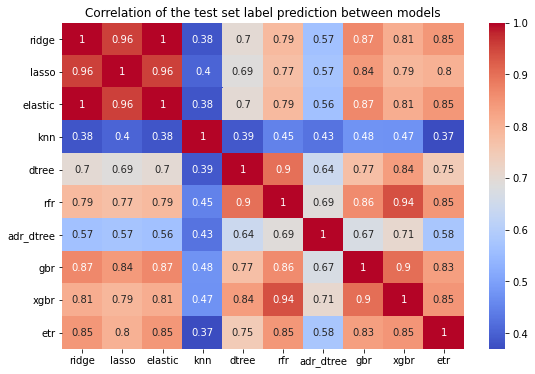

In [39]:
# Plot a heatmap of all correlations for easier visualization
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,6))
g = sns.heatmap(pred.corr(), annot=True, cmap='coolwarm', ax=ax)
g.set_title('Correlation of the test set label prediction between models')

In [40]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_bottom_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=True)
    return au_corr[0:n]

In [41]:
print("Bottom Absolute Correlations")
print(get_bottom_abs_correlations(pred, 5))

Bottom Absolute Correlations
knn      etr      0.369336
elastic  knn      0.383190
ridge    knn      0.383447
knn      dtree    0.388493
lasso    knn      0.404200
dtype: float64


## Voting Models

### Voting 5 models

In [47]:
from sklearn.ensemble import VotingRegressor

vreg1 = VotingRegressor(estimators=
                              [('xgbr', xgbr_grid.best_estimator_), 
                               ('gbr', gbr_grid.best_estimator_), 
                               ('rfr', rfr_grid.best_estimator_),
                               ('elastic', grid_elasticnet.best_estimator_),
                               ('ridge', grid_ridge.best_estimator_)
                              ])
vreg1_param = {
              'n_jobs': [-1]
             }
vreg1_grid = GridSearchCV(vreg1, vreg1_param,cv=5, return_train_score=True, scoring='neg_mean_absolute_error' )
vreg1_grid.fit(X_train,y_train)
print(f'Best Mean Cross Validation Score is {vreg1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {vreg1_grid.best_params_}')
print(f'Train score is {vreg1_grid.score(X_train,y_train)}')
print(f'Test score is {vreg1_grid.score(X_test,y_test)}')
#print(f'Val score is {vreg1_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is -709.0288192721457
Best Mean Cross Validation Score is {'n_jobs': -1}
Train score is -688.7124983770534
Test score is -714.7727928042518


### Voting least correlated models

In [49]:
from sklearn.ensemble import VotingRegressor
vreg1 = VotingRegressor(estimators=
                              [('knn', grid_knn.best_estimator_), 
                               ('adr_dtree', adr_dtree_grid.best_estimator_), 
                               ('etr', etr_grid.best_estimator_),
                               ('elastic', grid_elasticnet.best_estimator_),
                               ('ridge', grid_ridge.best_estimator_)
                              ] )
vreg1_param = {
              'n_jobs': [-1]
             }
vreg1_grid = GridSearchCV(vreg1, vreg1_param,cv=5, return_train_score=True, scoring='neg_mean_absolute_error' )
vreg1_grid.fit(X_train,y_train)
print(f'Best Mean Cross Validation Score is {vreg1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {vreg1_grid.best_params_}')
print(f'Train score is {vreg1_grid.score(X_train,y_train)}')
print(f'Test score is {vreg1_grid.score(X_test,y_test)}')
#print(f'Val score is {vreg1_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is -726.2484182811702
Best Mean Cross Validation Score is {'n_jobs': -1}
Train score is -710.3307672989353
Test score is -732.3511327716209


##Stacking Models 

### Stacking top 5 models

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LogisticRegression
sreg1 = StackingRegressor(estimators=
                              [
                               ('xgbr', xgbr_grid.best_estimator_), 
                               ('gbr', gbr_grid.best_estimator_), 
                               ('rfr', rfr_grid.best_estimator_),
                               ('elastic', grid_elasticnet.best_estimator_),
                               ('ridge', grid_ridge.best_estimator_)
                              ], final_estimator=LinearRegression())
sreg1_param = {
              'n_jobs': [-1]
             }
sreg1_grid = GridSearchCV(sreg1, sreg1_param ,cv=5, return_train_score=True, scoring='neg_mean_absolute_error' )
sreg1_grid.fit(X_train,y_train)
print(f'Best Mean Cross Validation Score is {sreg1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {sreg1_grid.best_params_}')
print(f'Train score is {sreg1_grid.score(X_train,y_train)}')
print(f'Test score is {sreg1_grid.score(X_test,y_test)}')
#print(f'Val score is {sreg1_grid.score(X_val,y_val)}')

### Stacking least correlated models

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LogisticRegression
sreg1 = StackingRegressor(estimators=
                              [
                               ('knn', grid_knn.best_estimator_), 
                               ('adr_dtree', adr_dtree_grid.best_estimator_), 
                               ('etr', etr_grid.best_estimator_),
                               ('elastic', grid_elasticnet.best_estimator_),
                               ('ridge', grid_ridge.best_estimator_)
                              ], final_estimator=LinearRegression())
sreg1_param = {
              'n_jobs': [-1]
             }
sreg1_grid = GridSearchCV(sreg1, sreg1_param ,cv=5, return_train_score=True, scoring='neg_mean_absolute_error')
sreg1_grid.fit(X_train,y_train)
print(f'Best Mean Cross Validation Score is {sreg1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {sreg1_grid.best_params_}')
print(f'Train score is {sreg1_grid.score(X_train,y_train)}')
print(f'Test score is {sreg1_grid.score(X_test,y_test)}')
#print(f'Val score is {sreg1_grid.score(X_val,y_val)}')

# Making predictions of the best model and generating csv file

## Loading Test Dataset

In [43]:
path = "https://raw.githubusercontent.com/rajadevineni/Applied_ML_Coding_Exam1/main/test_rev.csv"
prediction_data = pd.read_csv(path)
print('Shape of Dataset: ',prediction_data.shape)
prediction_data.rename(columns={"id ": "id"}, inplace=True)
prediction_data_x = prediction_data.drop("id", axis =1) 
#print("Updated dataset size:", prediction_data.shape)

Shape of Dataset:  (12784, 59)


## Predicting Labels

In [44]:
make_prediction_labels = xgbr_grid.predict(prediction_data_x)
make_prediction_labels.shape

(12784,)

In [45]:
pd.DataFrame({'id ': prediction_data.id, 'target': make_prediction_labels}).to_csv('RXD190017_solutions_xgbr.csv', index =False)